In [1]:
<h2>Financial institutions face significant risks due to loan defaults. Accurately predicting the
probability of default (PD) on loans is critical for risk management and strategic planning. 
In this competition, participants are tasked with developing a predictive model that estimates the
probability of default on loans using historical loan data.<h2>

### Objective:
The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.

###Data Dictionary

    unnamed-observation number.
    loan_id - unique identifier for each loan.
    Sex (Categories: male, female, other)
    disbursemet_date-date when loan funds were released and made available to the borrower.
    currency-currency in which the loan was issued(USD).
    country- country of origin for the borrower.
    sex - gender of the customer.
    is_employed- Not employed(False), employed(True).
    job- the job of the customer.
    location- place of residency of the client.
    loan_amount - amount for which loan is requested.
    number_of_defaults- the count of defaulted times of a customer.
    outstanding_balance- the amount not yet paid by the customer.
    interest_rate-percentage of loan amount that a customer pays to the bank as interest over a year.
    age - age of the customer.
    remaining term- amount of time remaining for the loan to be fully repaid.
    salary-income of the customer.
    marital_status- 1-married, 0-single.
    Loan Status- 1-defaulted, 0-Did not default.
    

SyntaxError: invalid syntax (1573965287.py, line 1)

In [3]:
### Import necessary libraries

In [5]:
# this will help in making the Python code more structured automatically (good coding practice)
import jupyter_black

jupyter_black.load()

# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
)  # Random Forest, Gradient Boosting Machines
from sklearn.svm import SVC  # Support Vector Machines

import pickle

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)
import pandas as pd

pd.set_option("display.max_columns", None)

In [7]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.

In [9]:
df = pd.read_csv(
    "C:/Users/Munashe Muchinako/OneDrive/Desktop/data science/Data Science Competion Question and Data/data_science_competition_2024.csv"
)

In [11]:
# copy the data into duplicate variable 'data' to avoid making changes to the original data

In [13]:
data_raw = df.copy()

In [15]:
# show top 5 rows in the data

In [17]:
data_raw.head(4)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default


In [19]:
# Display last 3 rows of the data

In [21]:
data_raw.tail(3)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
99997,99997,4f10e845-8f75-4cd5-9f3a-3dad3e04a483,female,2021 10 20,USD,Zimbabwe,female,True,Data Analyst,Kadoma,48000.0,0,34266.224130,0.23,43,0,53,3535.599759,married,43,Did not default
99998,99998,eded01ca-79d2-4e86-a1e3-2ea1354edca7,male,2021 08 22,USD,Zimbabwe,male,True,Engineer,Mutare,36000.0,2,71546.024917,0.22,49,2,59,3082.407123,single,49,Did not default
99999,99999,a37561ec-0901-4350-8a13-634f80ece55d,other,2022 04 29,USD,Zimbabwe,other,True,Engineer,Gweru,46000.0,0,43141.102930,0.21,47,0,47,2670.766532,married,47,Did not default


In [23]:
# Understand the data shape

In [25]:
data_raw.shape

(100000, 21)

In [27]:
# There are 100000 observations and 21 columns in the dataset

In [29]:
### Check the data types of the columns in the dataset.
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   loan_id               100000 non-null  object 
 2   gender                100000 non-null  object 
 3   disbursemet_date      100000 non-null  object 
 4   currency              100000 non-null  object 
 5   country               99900 non-null   object 
 6   sex                   100000 non-null  object 
 7   is_employed           100000 non-null  bool   
 8   job                   95864 non-null   object 
 9   location              99405 non-null   object 
 10  loan_amount           100000 non-null  float64
 11  number_of_defaults    100000 non-null  int64  
 12  outstanding_balance   100000 non-null  float64
 13  interest_rate         100000 non-null  float64
 14  age                   100000 non-null  int64  
 15  n

In [31]:
-We have 8 continuous variables(age.1, age, salary, Unnamed,  loan_amount, number_of_defaults, outstanding_balance, number_of_defaults.1 
-All other are categorical
-We can see that there are missing records in the dataset

SyntaxError: invalid syntax (784268103.py, line 1)

In [33]:
###Summary of the data

In [35]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,49999.500000,28867.657797,0.0,24999.750000,49999.500000,74999.250000,99999.0
loan_amount,100000.0,31120.000000,15895.093631,1000.0,21000.000000,31000.000000,40000.000000,273000.0
number_of_defaults,100000.0,0.441970,0.688286,0.0,0.000000,0.000000,1.000000,2.0
outstanding_balance,100000.0,36964.909763,10014.758477,0.0,29625.227472,35063.852394,42133.388817,150960.0
interest_rate,100000.0,0.210435,0.018725,0.1,0.200000,0.210000,0.220000,0.3
age,100000.0,43.570690,4.863760,21.0,40.000000,44.000000,47.000000,65.0
number_of_defaults.1,100000.0,0.441970,0.688286,0.0,0.000000,0.000000,1.000000,2.0
salary,100000.0,2781.804324,696.450055,250.0,2273.929349,2665.441567,3146.577655,10000.0
age.1,100000.0,43.570690,4.863760,21.0,40.000000,44.000000,47.000000,65.0


In [37]:
Observations

    Mean value for the age column is approx 44 and the median is 44. This shows that majority of the customers are under 44 years of age.
    Mean loan_amount is approx 31120 but it has a wide range with values from 1000 to 273000. We will explore this further in univariate analysis.
    Mean salary is 2782 and median is approx 2665.This shows that majority of the customers earn salaries below 2782.
    Mean value for outstanding balance is 36965.


IndentationError: unexpected indent (550239952.py, line 3)

In [39]:
###Display number of missing values per each column

In [41]:
data_raw.isna().sum()

Unnamed: 0                 0
loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

In [43]:
-The country, job and location variables has some missing values, we will impute them using mode(most frequent value) since there relatively few missing values compared to total dataset size

SyntaxError: invalid syntax (812506190.py, line 1)

In [45]:
###Data Cleaning

In [47]:
# Handling missing data

In [49]:
mode_country = data_raw["country"].mode()[0]  # calculate mode for country
mode_job = data_raw["job"].mode()[0]  # calculate mode for job
mode_location = data_raw["location"].mode()[0]  # calculate mode for location

# Fill missing values with mode
data_raw["country"].fillna(mode_country, inplace=True)
data_raw["job"].fillna(mode_job, inplace=True)
data_raw["location"].fillna(mode_location, inplace=True)

In [51]:
# Checking missing data again
data_raw.isnull().values.any()

False

In [53]:
# We can see that there are nolonger missing records

In [55]:
# Changing the target column loan status from string datatype to bolean-(defaulted=1 otherwise 0)
data_raw["Loan Status"] = np.where(data_raw["Loan Status"] == "Defaulted", 1, 0)

In [57]:
# Check for data row duplication between "age" and "age.1"
duplicate_rows = data_raw["age"].equals(data_raw["age.1"])
# Print the result (True if duplication, False otherwise)
print(duplicate_rows)

True


In [59]:
# Check for data row duplication between "gender" and "sex"
duplicate_rows = data_raw["gender"].equals(data_raw["sex"])
# Print the result (True if duplication, False otherwise)
print(duplicate_rows)

True


In [61]:
# The columns age and age.1 are duplicates as shown by the result above

In [63]:
# Check for data row duplication between "number_of_defaults" and "number_of_defaults.1"
duplicate_rows = data_raw["number_of_defaults"].equals(data_raw["number_of_defaults.1"])
# Print the result (True if duplication, False otherwise)
print(duplicate_rows)

True


In [65]:
# The columns number_of_defaults and number_of_defaults.1 are duplicates as shown by the result above

In [67]:
# Romove the duplicated columns, leaving original column and remove the unnamed column replace 'Unnamed' with the actual label)
data_raw.drop(
    ["age.1", "number_of_defaults.1", "sex", data_raw.columns[0]], axis=1, inplace=True
)

In [69]:
# Convert 'date' column to datetime from string
data_raw["disbursemet_date"] = pd.to_datetime(data_raw["disbursemet_date"])

In [71]:
##converting remaining term from string type to float
data_raw["remaining term"] = data_raw["remaining term"].str.replace("_", "")
data_raw["remaining term"] = data_raw["remaining term"].astype(float)

In [73]:
# check for duplicate rows based on all columns
duplicate_rows = data_raw[data_raw.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [loan_id, gender, disbursemet_date, currency, country, is_employed, job, location, loan_amount, number_of_defaults, outstanding_balance, interest_rate, age, remaining term, salary, marital_status, Loan Status]
Index: []


In [75]:
# There are no more duplicates

In [77]:
# Taking a  closer look on currency column
data_raw["currency"].value_counts()

currency
USD     99980
$USD       20
Name: count, dtype: int64

In [79]:
# Formatting value $USD to USD
data_raw["currency"] = data_raw["currency"].str.replace("$USD", "USD")
data_raw["currency"].value_counts()

currency
USD    100000
Name: count, dtype: int64

In [81]:
# getting rid of empty spaces before each location
data_raw["location"] = data_raw["location"].str.strip()
data_raw["location"].value_counts()

location
Harare            9148
Bulawayo          8263
Mutare            8262
Gweru             7983
Masvingo          7665
Marondera         7513
Rusape            6506
Chivhu            6411
Plumtree          5552
Beitbridge        5311
Chipinge          4447
Chimanimani       4388
Kwekwe            3491
Chiredzi          3199
Kadoma            3118
Nyanga            2142
Karoi             1899
Shurugwi          1359
Zvishavane        1301
Gokwe              920
Kariba             671
Victoria Falls     219
Redcliff           191
Hwange              41
Name: count, dtype: int64

In [83]:
# checking counts of data values in the country column
data_raw["country"].value_counts()

country
Zimbabwe    99887
zimbabwe      100
Zim            13
Name: count, dtype: int64

In [85]:
# Correcting the all the values to become Zimbabwe
data_raw["country"] = data_raw["country"].str.title()
data_raw["country"] = data_raw["country"].str.replace("Zim", "Zimbabwe")
data_raw["country"] = data_raw["country"].str.replace("Zimbabwebabwe", "Zimbabwe")
data_raw["country"].value_counts()

country
Zimbabwe    100000
Name: count, dtype: int64

In [87]:
# Taking a closer look on various customer jobs
data_raw["job"].value_counts()

job
Engineer              20660
Nurse                 15284
Data Analyst          13204
Doctor                12186
Software Developer    11932
Teacher                8950
Accountant             7802
SoftwareDeveloper      3564
Data Scientist         3521
Lawyer                 2862
Data Scintist            35
Name: count, dtype: int64

In [89]:
##Correcting typing errors in job values
data_raw["job"] = data_raw["job"].replace("Data Scintist", "Data Scientist")
data_raw["job"] = data_raw["job"].replace("SoftwareDeveloper", "Software Developer")

In [91]:
data_raw.head()

,loan_id,gender,disbursemet_date,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022-10-29,USD,Zimbabwe,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47.0,3230.038869,married,0
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020-06-06,USD,Zimbabwe,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62.0,3194.139103,single,0
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023-09-29,USD,Zimbabwe,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57.0,3330.826656,married,0
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022-06-22,USD,Zimbabwe,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,42.0,2246.797020,divorced,0
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023-02-08,USD,Zimbabwe,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,45.0,2310.858441,married,0


In [93]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loan_id              100000 non-null  object        
 1   gender               100000 non-null  object        
 2   disbursemet_date     100000 non-null  datetime64[ns]
 3   currency             100000 non-null  object        
 4   country              100000 non-null  object        
 5   is_employed          100000 non-null  bool          
 6   job                  100000 non-null  object        
 7   location             100000 non-null  object        
 8   loan_amount          100000 non-null  float64       
 9   number_of_defaults   100000 non-null  int64         
 10  outstanding_balance  100000 non-null  float64       
 11  interest_rate        100000 non-null  float64       
 12  age                  100000 non-null  int64         
 13  remaining term 

In [95]:
data = data_raw.copy()

In [97]:
#### Distribution of variables in the data

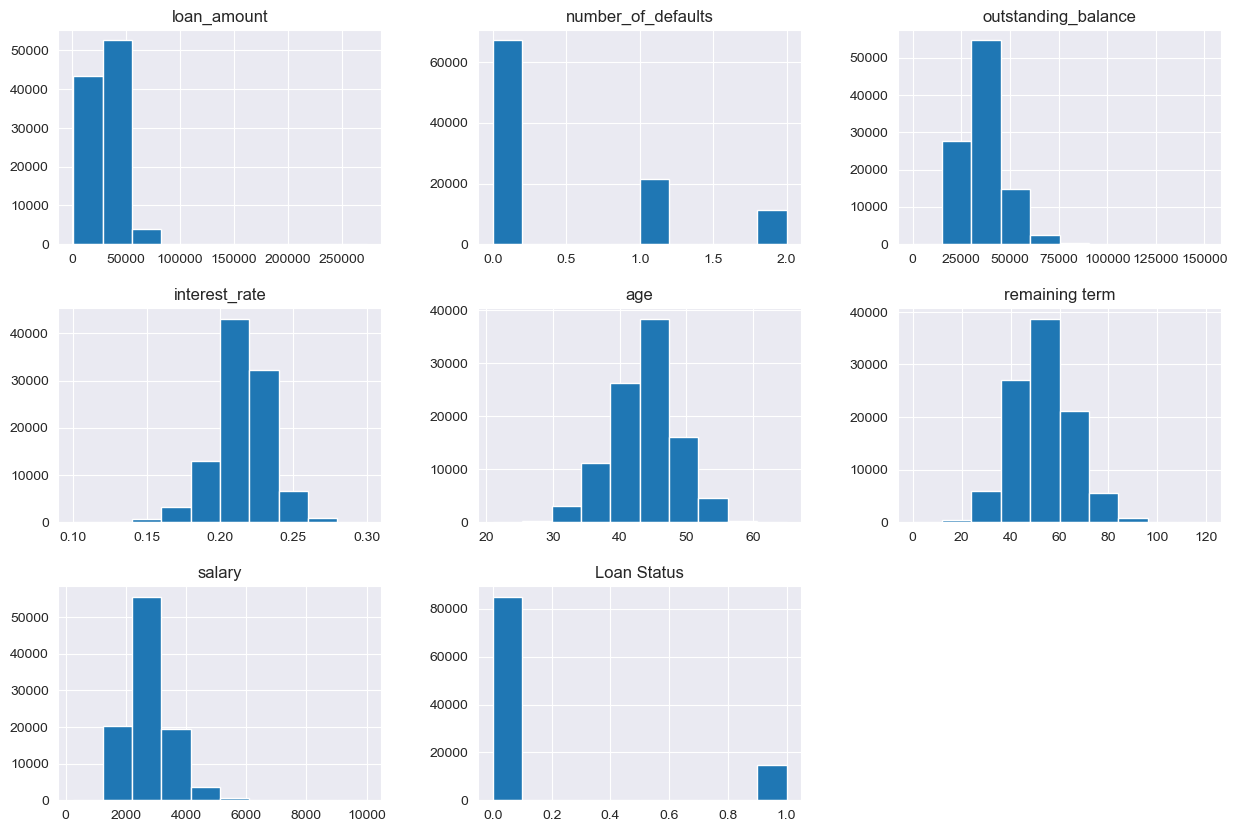

In [99]:
## Univariate analysis
sns.set_style("darkgrid")
data.iloc[:, 8:17].hist(figsize=(15, 10))
plt.show()

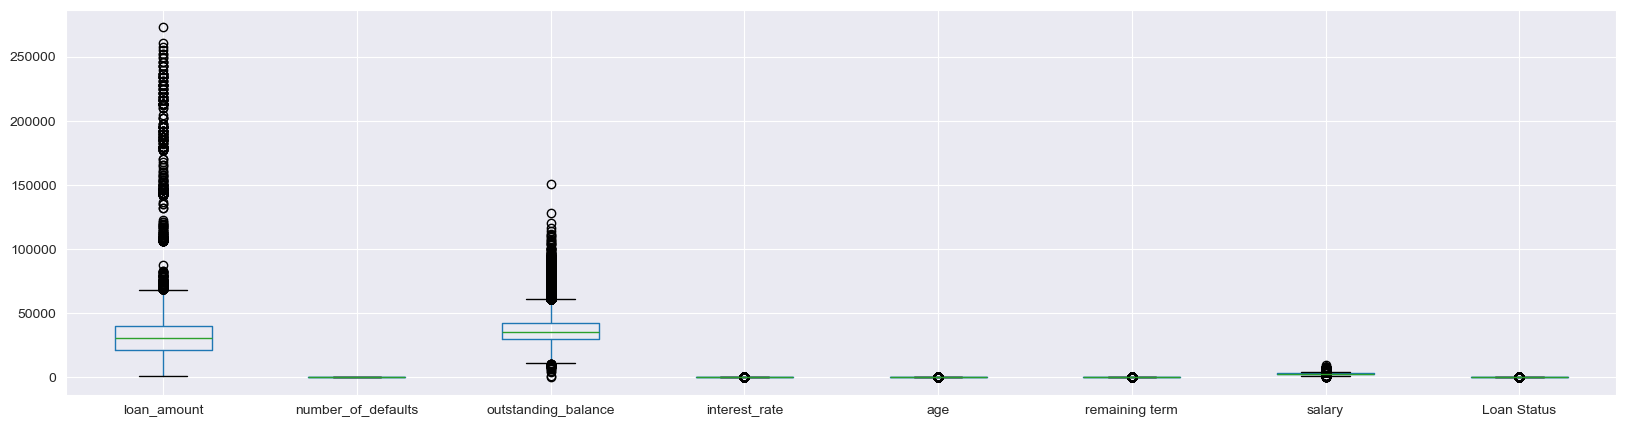

In [100]:
data.iloc[:, 8:17].boxplot(figsize=(20, 5))
plt.show()

In [102]:
# Checking the loan Status distibution amoung defaults and non defaults
data["Loan Status"].value_counts(1)

Loan Status
0    0.85134
1    0.14866
Name: proportion, dtype: float64

In [105]:
# It can be clearly seen that there is only 14.9% of defaulters, compared to 85% who did not default

In [107]:
# Cross-table of gender and Loan Status
round(data.groupby(["gender"])["Loan Status"].value_counts(1), 2).unstack()

Loan Status,0,1
gender,,
female,0.88,0.12
male,0.84,0.16
other,0.84,0.16


In [109]:
# It seems that among gendor the proportion of women who defaults is lower, compared to the other gender

In [111]:
# check if any value in each column is xero
has_zeros_in_loan_amount = (data["loan_amount"] == 0).any()
print(has_zeros_in_loan_amount)

False


In [113]:
# There is no observations with zero values

In [115]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
import shap

# Explain the model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Force plot for a single prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[0])


In [117]:
### Observation on Age

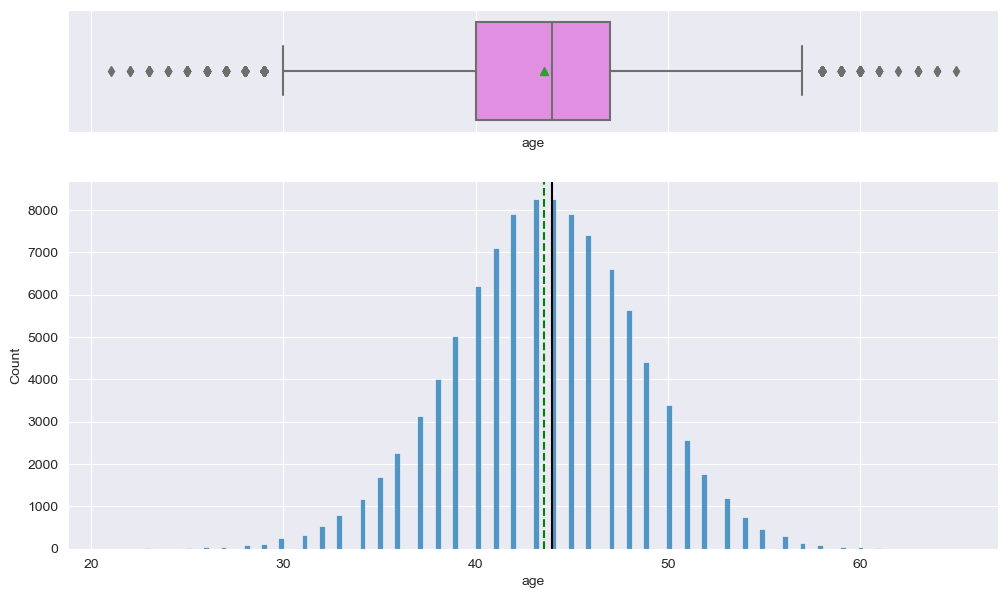

In [119]:
histogram_boxplot(data, "age")

In [120]:
- The distribution of age is equal
- The boxplot shows that there are outliers at both  ends
- We will not treat these outliers as they represent the real market trend

SyntaxError: invalid syntax (563311332.py, line 1)

In [122]:
### Observation on Credit Amount

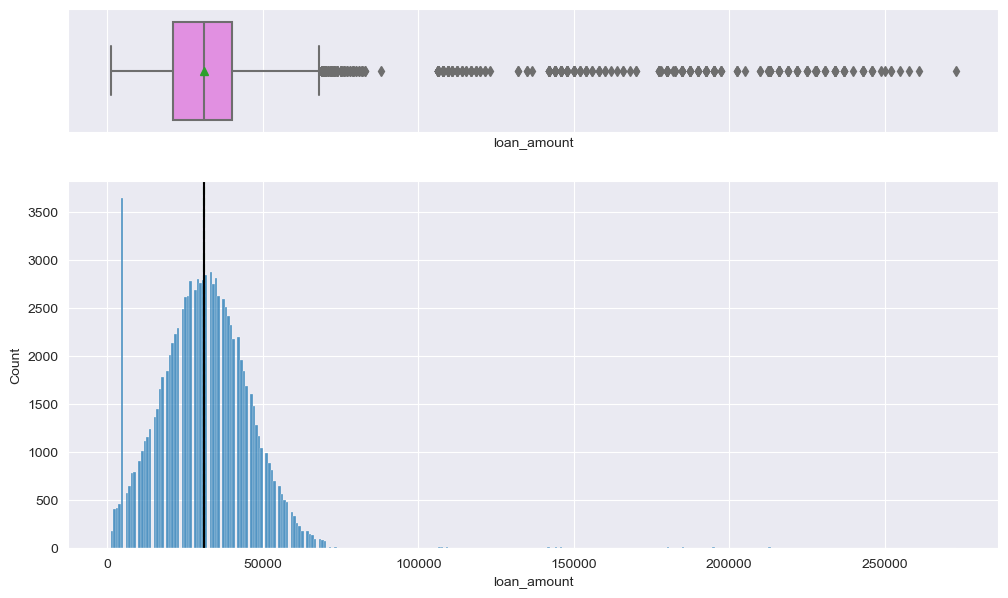

In [124]:
histogram_boxplot(data, "loan_amount")

In [125]:
    The distribution of the loan_amount is right-skewed
    The boxplot shows that there are outliers at the right end
    We will not treat these outliers as they represent the real market trend



SyntaxError: invalid syntax (2768353005.py, line 1)

In [ ]:
### Observations on Duration

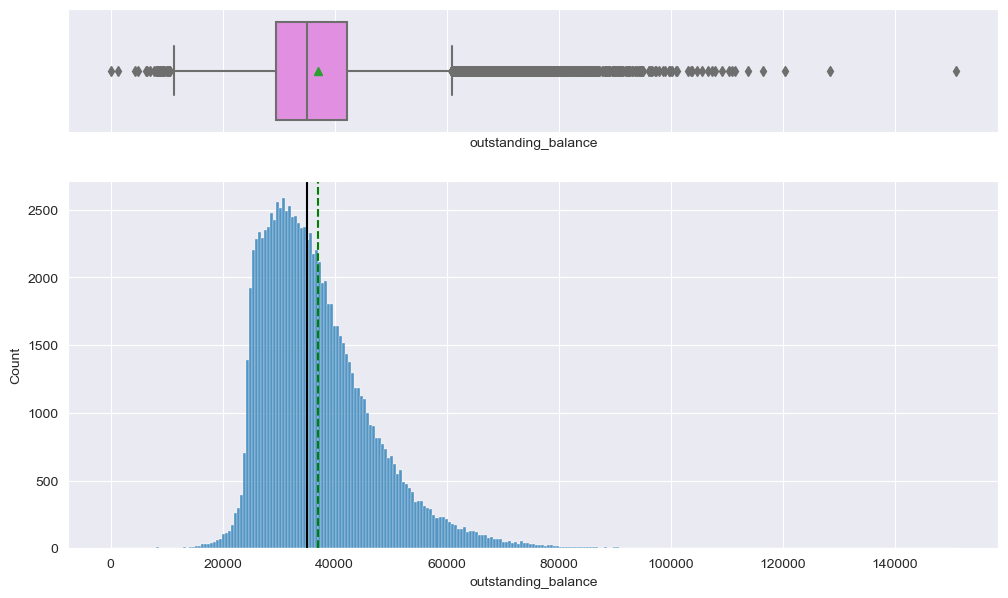

In [128]:
histogram_boxplot(data, "outstanding_balance")

In [129]:

    The distribution of the outstanding_balance is right-skewed
    The boxplot shows that there are outliers at both ends
    We will not treat these outliers as they represent the real market trend


SyntaxError: invalid syntax (2557596335.py, line 1)

In [131]:
### Observations on remaining term for the loan to be fully repaid

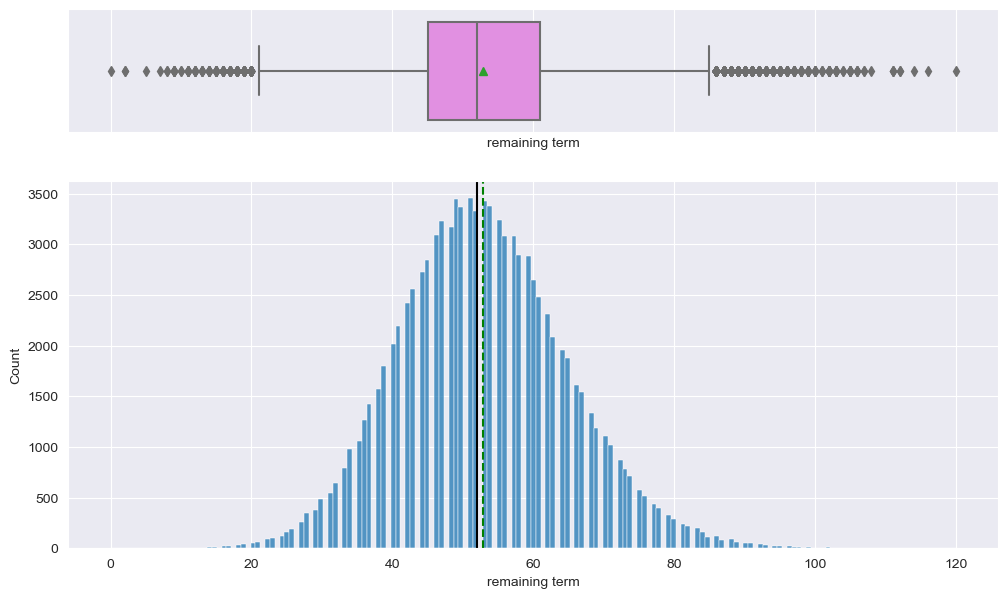

In [133]:
histogram_boxplot(data, "remaining term")

In [135]:
-The remaining time is equally distributed

SyntaxError: invalid syntax (1642215531.py, line 1)

In [137]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [139]:
### Observations on loan status

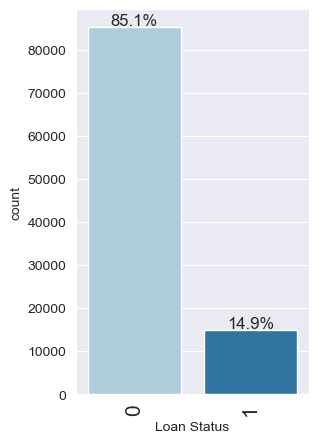

In [141]:
labeled_barplot(data, "Loan Status", perc=True)

In [143]:
- The class distribution in the target variable is imbalanced.
- We have 85.1% observations for non-defaulters and 14.9% observations for defaulters.

SyntaxError: invalid syntax (1281609428.py, line 1)

In [146]:
###Observation on sex

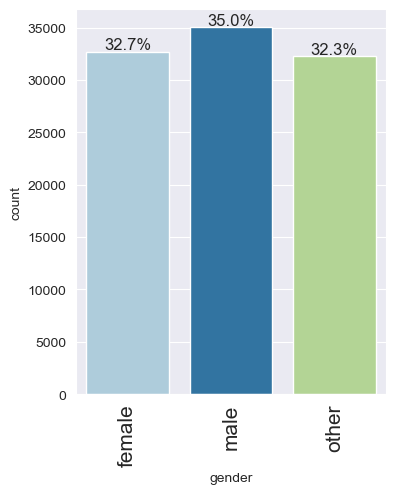

In [148]:
labeled_barplot(data, "gender", perc=True)

In [150]:
- Male customers are taking more credit than female customers
- There are 35% male customers and 32.7% female customers
-The other portion belongs to 'other' class

SyntaxError: invalid syntax (2556483900.py, line 1)

In [152]:
###Observation on marriage status

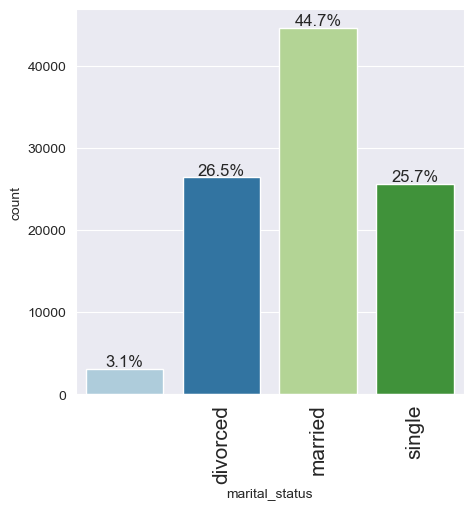

In [154]:
labeled_barplot(data, "marital_status", perc=True)

In [156]:

    """Majority of the customers i.e. 44% fall into the married category which makes sense as these may be the persons who require loans to help them supply family needs.
    There are only approx 27% customers that lie in divorced category.
    There are only approx 27% observations  that fall under single category.
    There are very few persons with unknown marital status."""


'Majority of the customers i.e. 44% fall into the married category which makes sense as these may be the persons who require loans to help them supply family needs.\nThere are only approx 27% customers that lie in divorced category.\nThere are only approx 27% observations  that fall under single category.\nThere are very few persons with unknown marital status.'

In [158]:
###Bivariate Analysis
# Checking variable distribution in the data

In [160]:
"""sns.pairplot(data, hue="Loan Status")
plt.show()"""

'sns.pairplot(data, hue="Loan Status")\nplt.show()'

In [162]:
- There are overlaps i.e., no clear distinction in the distribution of variables for people who have defaulted and did not default.
- Let's explore this further with the help of other plots.

SyntaxError: unterminated string literal (detected at line 2) (2901688299.py, line 2)

In [164]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [166]:
### Loan status vs Age

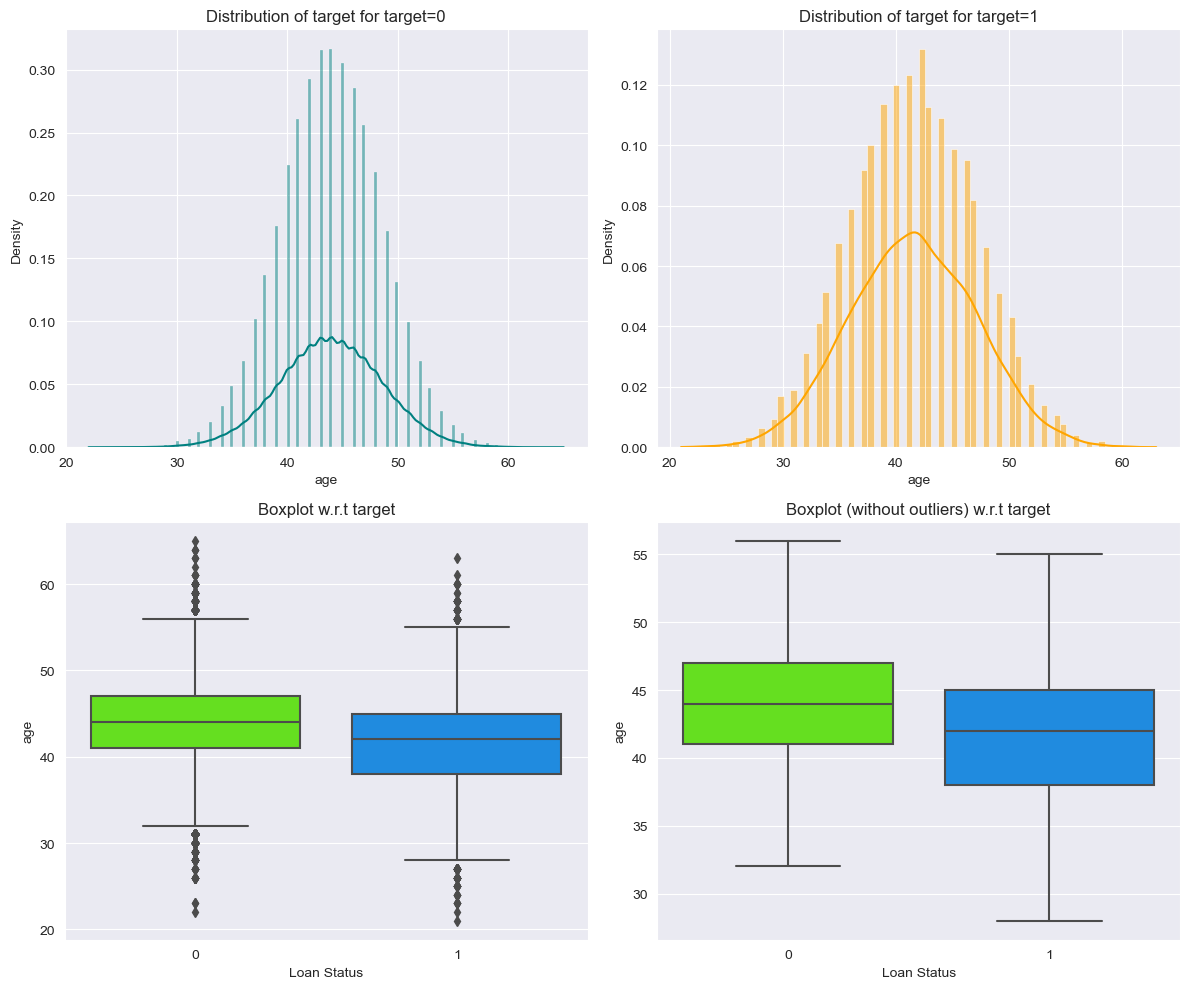

In [168]:
distribution_plot_wrt_target(data, "age", "Loan Status")

In [169]:
- We can see that the median age of defaulters is less than the median age of non-defaulters.
- This shows that younger customers are more likely to default.
- There are outliers in boxplots of both class distributions

SyntaxError: invalid syntax (1019616348.py, line 1)

In [171]:
### Loan Status vs loan amount

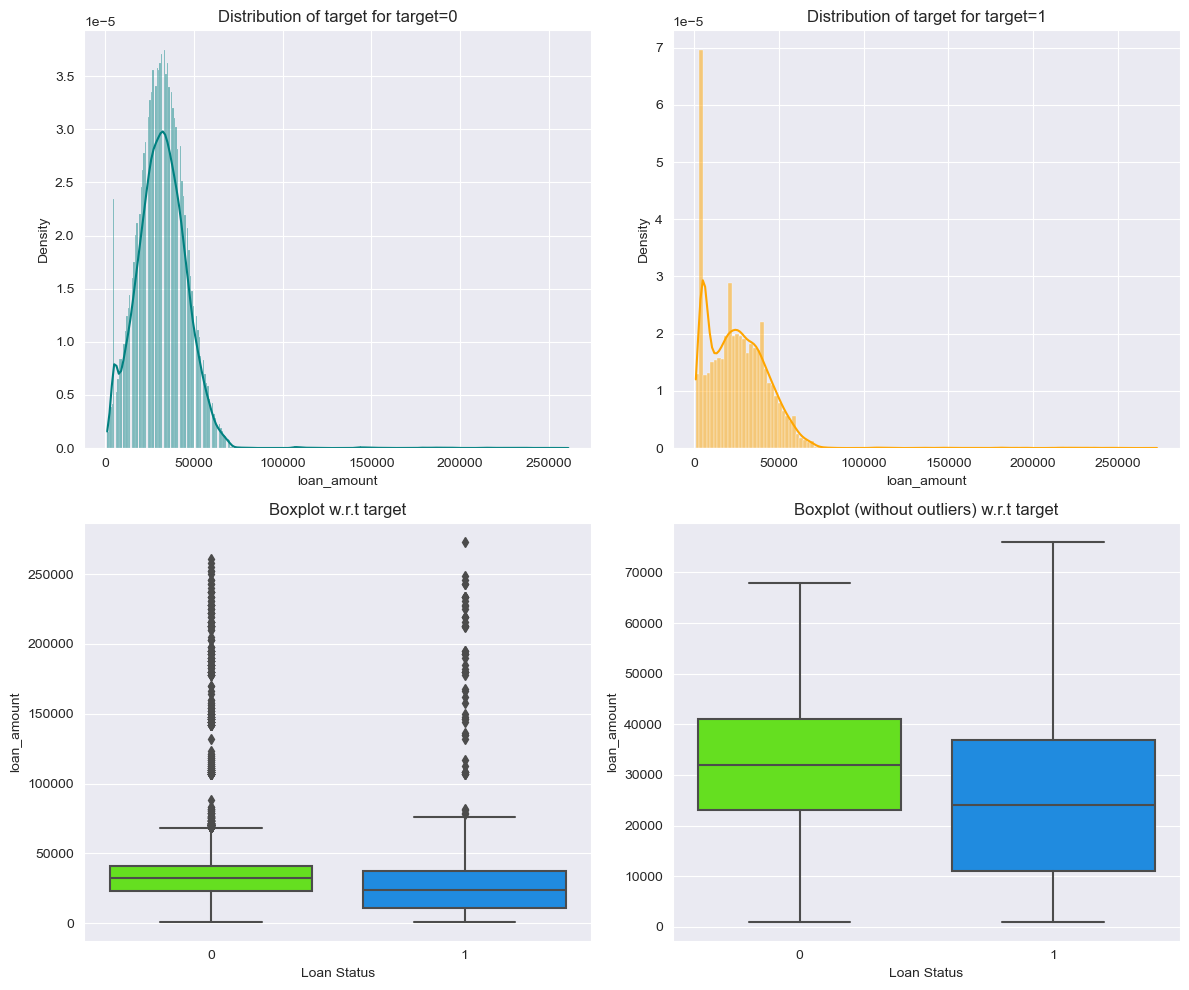

In [173]:
distribution_plot_wrt_target(data, "loan_amount", "Loan Status")

In [174]:
- We can see that the lower quartile loan amount of defaulters is much less than the lower quartile amount of non-defaulters.
- This shows that customers with low loan amount are more likely to default.
- The bank may need to be more cautious when approving smaller loans
- There are outliers in boxplots of both class distributions

SyntaxError: invalid syntax (1449148095.py, line 1)

In [ ]:
### Risk vs remaining term

In [ ]:
distribution_plot_wrt_target(data, "remaining term", "Loan Status")

In [178]:
-The median remaining term of non defaulters is equal to the median remaining term of defaulters
-This shows that the remaining term  may not be a significant factor in distinguishing between defaulters and non defaulters

SyntaxError: invalid syntax (3855080911.py, line 1)

In [180]:
## Interest vs Loan Status

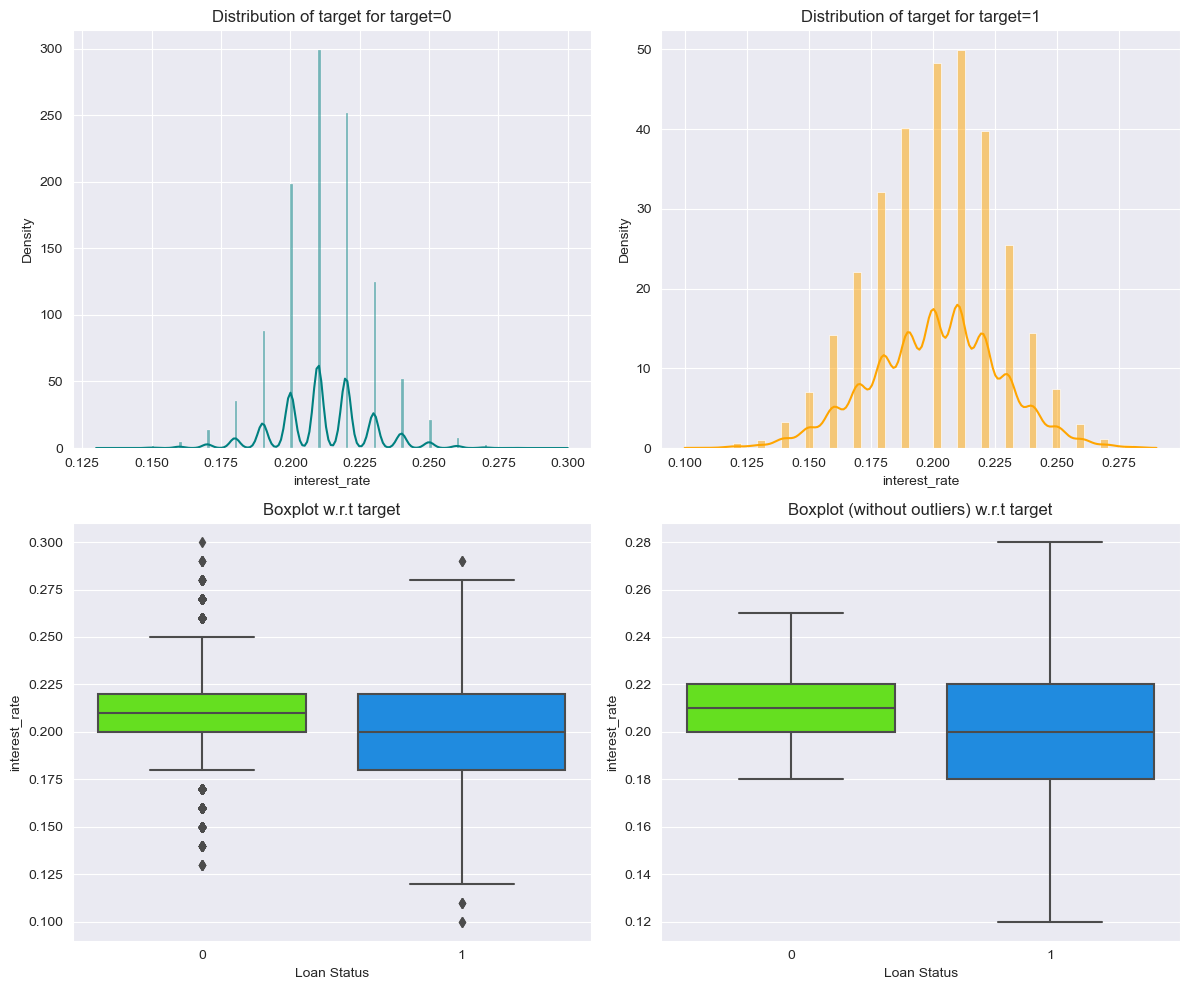

In [182]:
distribution_plot_wrt_target(data, "interest_rate", "Loan Status")

In [183]:
-Lower meadian interest rate for defaulters compared to non defaulters
-Lower lower quatile Q1 interest rate for defaulters compared to non defaulters
-This implies that lower interest rate may not necesssarily a guarantee of loan repayment
-The defaulters may be more likely to have lower creditworthiness despite having lower interest rates

SyntaxError: invalid syntax (4019131084.py, line 1)

In [ ]:
##Salary vs Loan Status

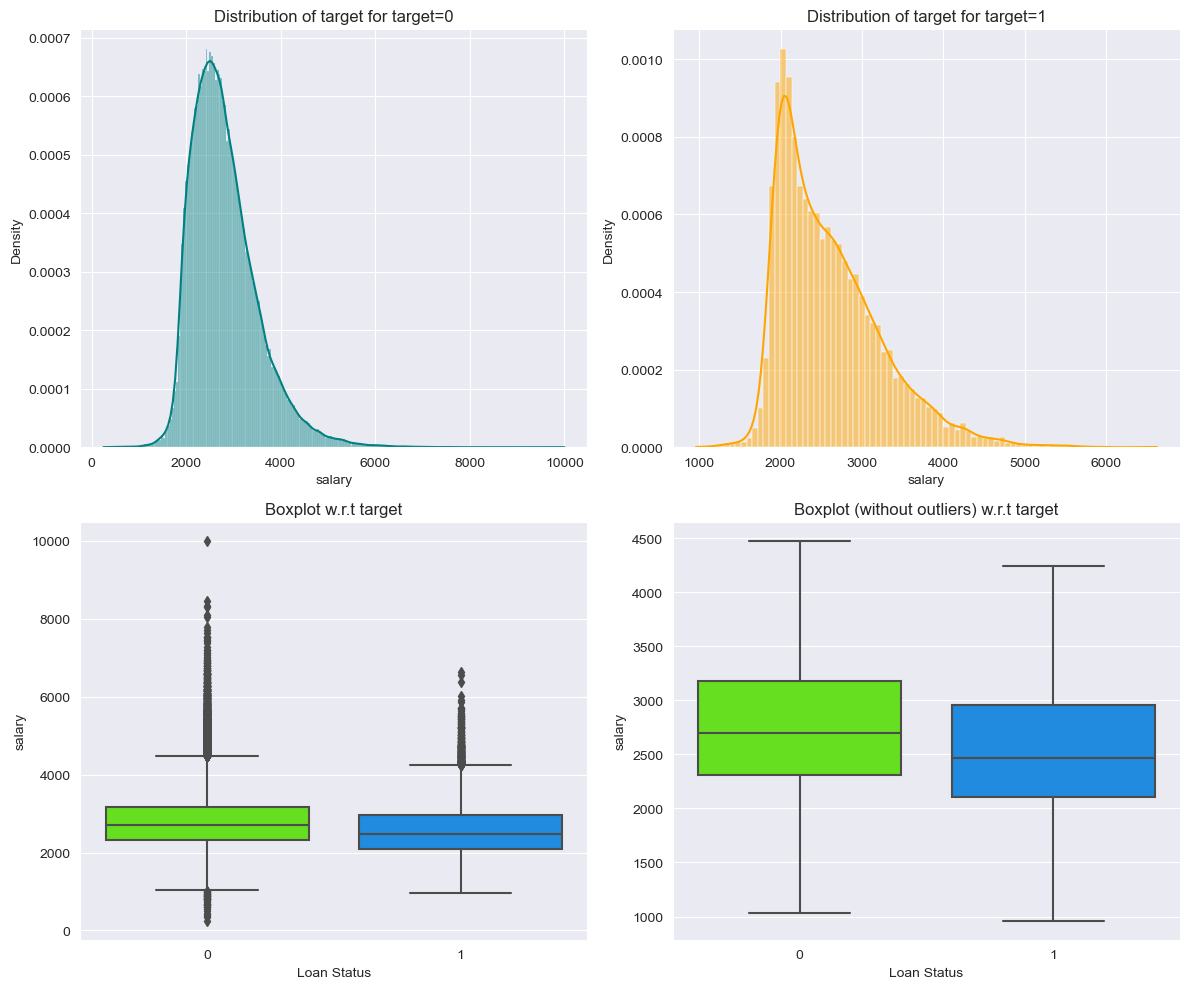

In [186]:
distribution_plot_wrt_target(data, "salary", "Loan Status")

In [187]:
-The median salary for defaulters is much lower than the median salary for non defaulters
-This means that lower income customers are more likely to default on loan
-It also shows that higher income customers tend to have greater financial stability and ability to repay loans                                                                   

SyntaxError: invalid syntax (3388573972.py, line 1)

In [ ]:
##Number_of_defaults vs Loan Status

In [ ]:
distribution_plot_wrt_target(data, "outstanding_balance", "Loan Status")

In [ ]:
-The median outstanding balance for defaulters is lower than that of non defaulters
-This shows that defaulters tend to have lower outstanding balances but still struggle to repay their loans
-Non defaulters have higher oustanding balance but still manages to repay their loans

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [193]:
###Loan Status vs Sex

In [195]:
stacked_barplot(data, "gender", "Loan Status")

NameError: name 'stacked_barplot' is not defined

In [197]:
- We saw earlier that the percentage of male customers is more than the female customers. This plot shows that male customers are more likely to default as compared to female customers.

SyntaxError: invalid syntax (2279534423.py, line 1)

In [199]:
##Loan amount vs Loan Status

In [201]:
stacked_barplot(data, "marital_status", "Loan Status")

NameError: name 'stacked_barplot' is not defined

In [203]:
-This plot shows that divorced customers are more likely to default as compared to single and married customers.

SyntaxError: invalid syntax (3755337915.py, line 1)

In [205]:
##Job vs Loan status

In [207]:
stacked_barplot(data, "job", "Loan Status")

NameError: name 'stacked_barplot' is not defined

In [209]:
# The plot above shows that lawyers are more likely to default followed by Data Scientists

In [211]:
# location vs loan status
stacked_barplot(data, "location", "Loan Status")

NameError: name 'stacked_barplot' is not defined

In [213]:
As we can see from above, customers from above customers from Hwange followed by victoria falls, Gokwe etc are more likely to default 

SyntaxError: invalid syntax (1868322344.py, line 1)

In [215]:
# Employment status  vs loan status
stacked_barplot(data, "is_employed", "Loan Status")

NameError: name 'stacked_barplot' is not defined

In [217]:
# More customers who are unemployed are likely to default

In [219]:
# number of defaults vs loan status
stacked_barplot(data, "number_of_defaults", "Loan Status")

NameError: name 'stacked_barplot' is not defined

In [221]:
# Customers who have 2 records of defaults are more prone to default followed by one

In [223]:
###Model evaluation criterion
Model can make wrong predictions as:

    Model predicted a non-defaulter as a defaulter - False Positive
    Model predicted a defaulter as a non-defaulter - False Negative

How to reduce this loss i.e need to reduce False Negatives ?

    Bank would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.



SyntaxError: invalid syntax (2924080687.py, line 2)

In [225]:
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

    The model_performance_classification_statsmodels function will be used to check the model performance of models.
    The confusion_matrix_statsmodels function will be used to plot confusion matrix.


SyntaxError: invalid syntax (2094811168.py, line 1)

In [229]:
### Data Preparation

In [231]:
### Logistic Regression (with statsmodels library)

In [233]:
X = data[
    [
        "gender",
        "is_employed",
        "job",
        "remaining term",
        "loan_amount",
        "number_of_defaults",
        "outstanding_balance",
        "interest_rate",
        "age",
        "salary",
        "marital_status",
    ]
]
Y = data["Loan Status"]

In [235]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# standardising continuous variables
scaler = StandardScaler()
X[
    [
        "interest_rate",
        "remaining term",
        "salary",
        "outstanding_balance",
        "age",
        "loan_amount",
    ]
] = scaler.fit_transform(
    X[
        [
            "interest_rate",
            "remaining term",
            "salary",
            "outstanding_balance",
            "age",
            "loan_amount",
        ]
    ]
)

# Saving the Standard Scaler
pickle.dump(
    scaler,
    open(
        "C:/Users/Munashe Muchinako/OneDrive/Desktop/data science/Data Science Competion Question and Data/fastapi endpoints/ML Models/StandardScaler.pkl",
        "wb",
    ),
)


# adding constant
X = sm.add_constant(X)


# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [237]:
print(X_train.shape, X_test.shape)

(80000, 22) (20000, 22)


In [239]:
# Initialising  models

In [241]:
"""models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
}"""

'models = {\n    "Logistic Regression": LogisticRegression(max_iter=1000),\n    "Decision Tree": DecisionTreeClassifier(),\n    "Random Forest": RandomForestClassifier(n_estimators=100),\n    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),\n    "SVM": SVC(probability=True),\n}'

In [243]:
# Define model parameters
model_params = {
    "Logistic Regression": [
        {"solver": "liblinear", "C": 0.1},
        {"solver": "liblinear", "C": 1.0},
        {"solver": "liblinear", "C": 10.0},
        {"solver": "newton-cg", "C": 1.0},
        {"solver": "saga", "C": 1.0},
    ],
    "Decision Tree": [
        {"max_depth": 5, "min_samples_split": 10},
        {"max_depth": 10, "min_samples_split": 5},
        {"max_depth": None, "min_samples_split": 10},
        {"max_depth": 5, "min_samples_split": 2},
        {"max_depth": 15, "min_samples_split": 5},
    ],
    "Random Forest": [
        {"n_estimators": 50, "max_depth": 10},
        {"n_estimators": 100, "max_depth": 15},
        {"n_estimators": 200, "max_depth": None},
        {"n_estimators": 100, "max_depth": 10},
        {"n_estimators": 150, "max_depth": 20},
    ],
    "Gradient Boosting": [
        {"n_estimators": 50, "learning_rate": 0.1},
        {"n_estimators": 100, "learning_rate": 0.1},
        {"n_estimators": 150, "learning_rate": 0.05},
        {"n_estimators": 100, "learning_rate": 0.01},
        {"n_estimators": 200, "learning_rate": 0.1},
    ],
}

In [245]:
# Train and Evaluate the models


Logistic Regression Models:

Model 1 with parameters: {'solver': 'liblinear', 'C': 0.1}

Model 2 with parameters: {'solver': 'liblinear', 'C': 1.0}

Model 3 with parameters: {'solver': 'liblinear', 'C': 10.0}

Model 4 with parameters: {'solver': 'newton-cg', 'C': 1.0}

Model 5 with parameters: {'solver': 'saga', 'C': 1.0}
Logistic Regression:
Accuracy:0.8716
F1 Score:0.3308
Recall:0.2065
Precision:0.8312
ROC AUC:0.7345


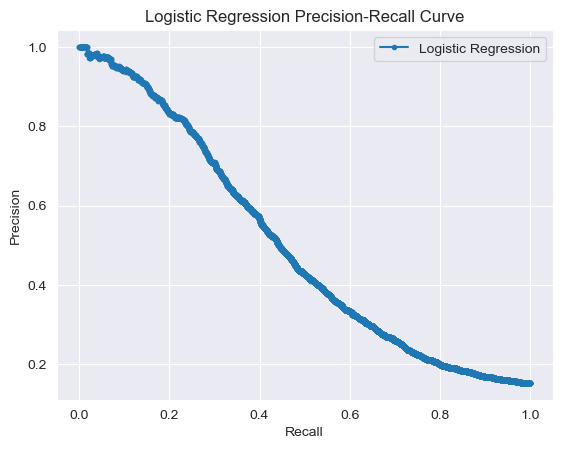

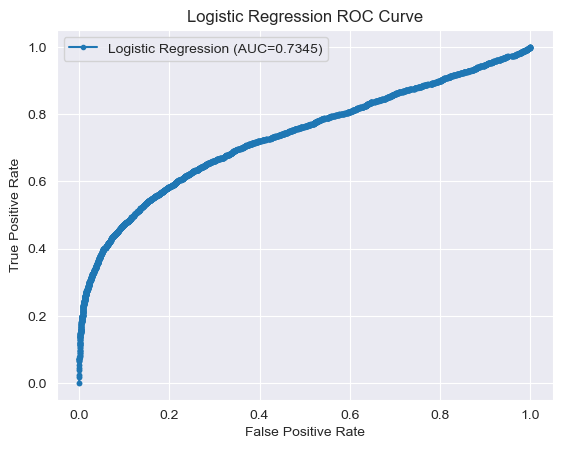

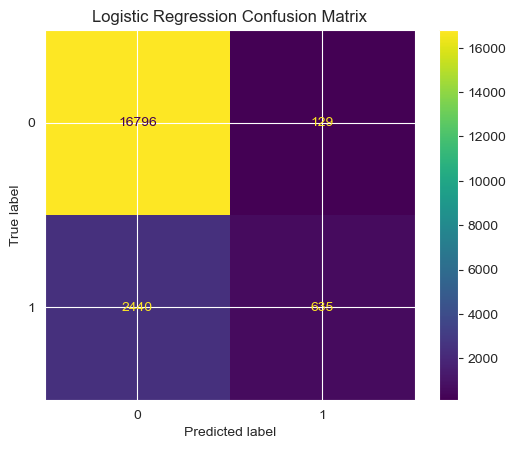


Decision Tree Models:

Model 1 with parameters: {'max_depth': 5, 'min_samples_split': 10}

Model 2 with parameters: {'max_depth': 10, 'min_samples_split': 5}

Model 3 with parameters: {'max_depth': None, 'min_samples_split': 10}

Model 4 with parameters: {'max_depth': 5, 'min_samples_split': 2}

Model 5 with parameters: {'max_depth': 15, 'min_samples_split': 5}
Decision Tree:
Accuracy:0.8898
F1 Score:0.5449
Recall:0.4293
Precision:0.7458
ROC AUC:0.7620


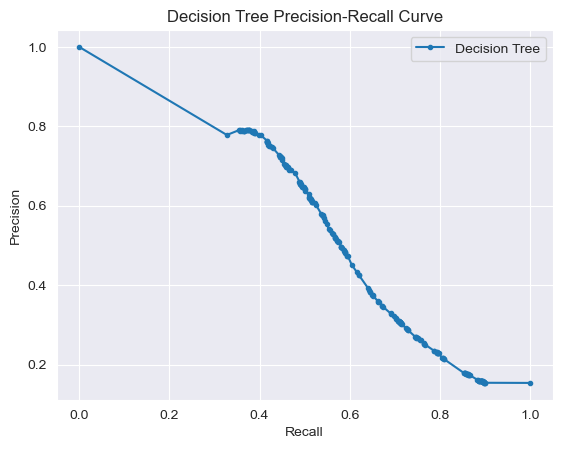

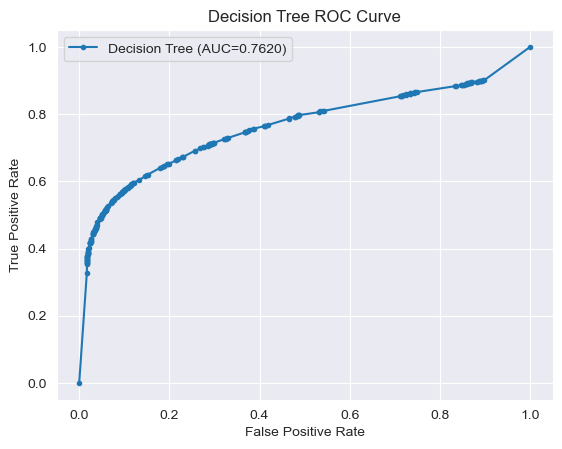

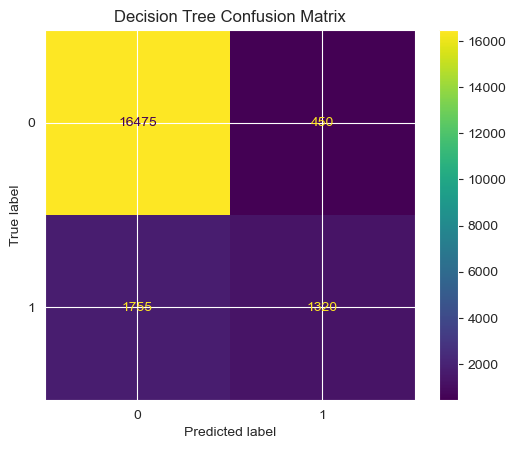


Random Forest Models:

Model 1 with parameters: {'n_estimators': 50, 'max_depth': 10}

Model 2 with parameters: {'n_estimators': 100, 'max_depth': 15}

Model 3 with parameters: {'n_estimators': 200, 'max_depth': None}

Model 4 with parameters: {'n_estimators': 100, 'max_depth': 10}

Model 5 with parameters: {'n_estimators': 150, 'max_depth': 20}
Random Forest:
Accuracy:0.9008
F1 Score:0.5552
Recall:0.4026
Precision:0.8939
ROC AUC:0.8627


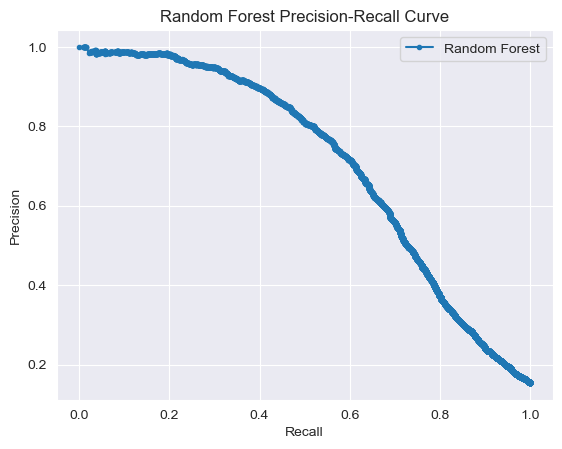

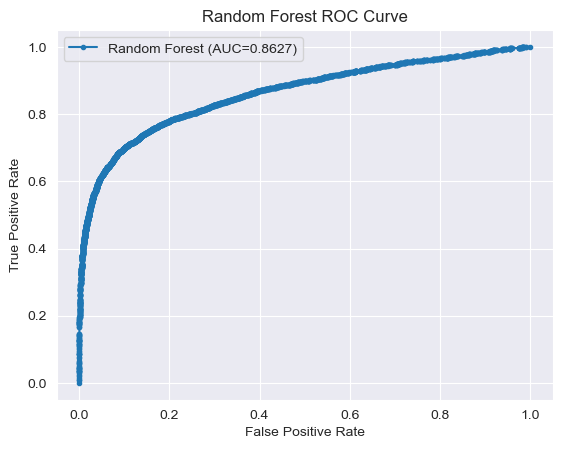

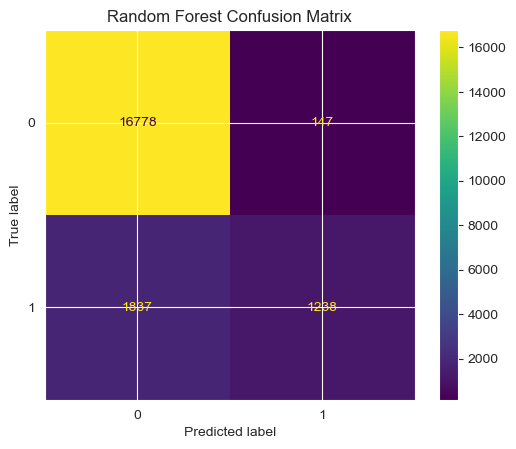


Gradient Boosting Models:

Model 1 with parameters: {'n_estimators': 50, 'learning_rate': 0.1}

Model 2 with parameters: {'n_estimators': 100, 'learning_rate': 0.1}

Model 3 with parameters: {'n_estimators': 150, 'learning_rate': 0.05}

Model 4 with parameters: {'n_estimators': 100, 'learning_rate': 0.01}

Model 5 with parameters: {'n_estimators': 200, 'learning_rate': 0.1}
Gradient Boosting:
Accuracy:0.8959
F1 Score:0.5328
Recall:0.3860
Precision:0.8595
ROC AUC:0.8513


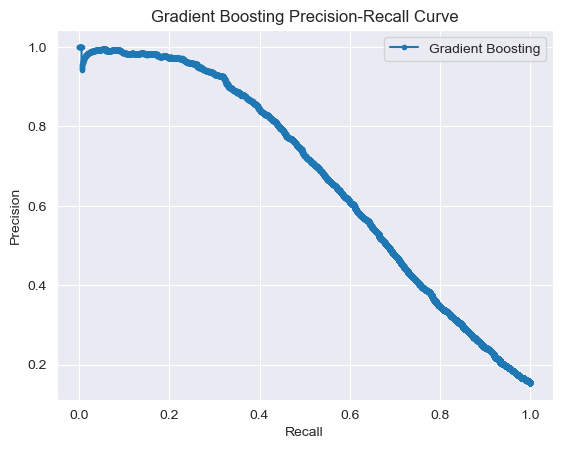

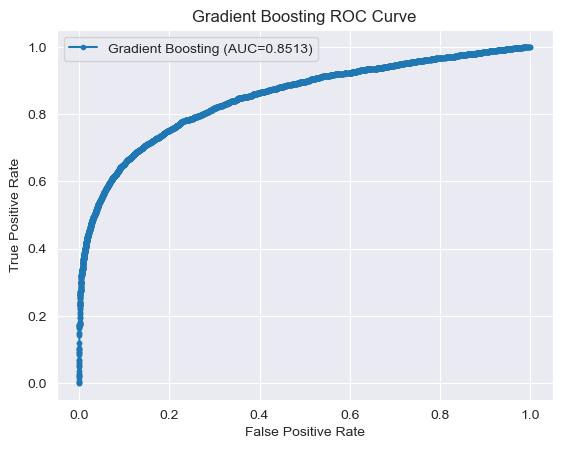

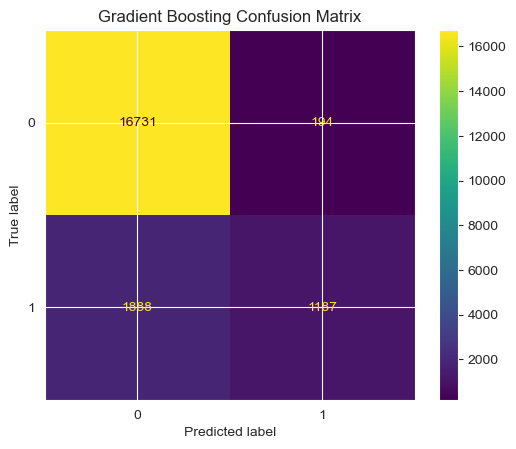

In [247]:
for algorithm, params_list in model_params.items():
    print(f"\n{algorithm} Models:")
    for i, params in enumerate(params_list):
        print(f"\nModel {i+1} with parameters: {params}")

        if algorithm == "Logistic Regression":
            model = LogisticRegression(max_iter=1000, **params)
        elif algorithm == "Decision Tree":
            model = DecisionTreeClassifier(**params)
            model.fit(X_train, y_train)
            # Saving the Decision Tree
            pickle.dump(
                model,
                open(
                    "C:/Users/Munashe Muchinako/OneDrive/Desktop/data science/Data Science Competion Question and Data/fastapi endpoints/ML Models/DecisionTree.pkl",
                    "wb",
                ),
            )

        elif algorithm == "Random Forest":
            model = RandomForestClassifier(**params)
        elif algorithm == "Gradient Boosting":
            model = GradientBoostingClassifier(**params)
        elif algorithm == "SVM":
            model = SVC(probability=True, **params)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = (
            model.predict_proba(X_test)[:, 1]
            if hasattr(model, "predict_proba")
            else model.decision_function(X_test)
        )

        # Function for Metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        cm = confusion_matrix(y_test, y_pred)

    # Displaying the outcomes
    print(f"{algorithm}:")
    print(f"Accuracy:{accuracy:.4f}")
    print(f"F1 Score:{f1:.4f}")
    print(f"Recall:{recall:.4f}")
    print(f"Precision:{precision:.4f}")
    print(f"ROC AUC:{roc_auc:.4f}")
    """print("Confusion Matrix:")
    #print(cm)"""

    # Plot precision-Recall curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall_vals, precision_vals, marker=".", label=f"{algorithm}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{algorithm} Precision-Recall Curve")
    plt.legend()
    plt.show()

    # Plot Roc Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, marker=".", label=f"{algorithm} (AUC={roc_auc:.4f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{algorithm} ROC Curve")
    plt.legend()
    plt.show()

    # defining a function to plot the confusion_matrix of a classification model
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    """plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="g")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")"""
    disp.plot()
    plt.title(f"{algorithm} Confusion Matrix")
    plt.show()
    """
    cm = confusion_matrix(y_train, pred_train)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="g")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()"""